# Spaceship Titanic Challenge

## Import libraries

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Load the DataSet

In [18]:
train_data = pd.read_csv('train.csv') # Will be used for train the model
test_data = pd.read_csv('test.csv') # Will be used for test the model

In [19]:
train_data.shape, test_data.shape

((8693, 14), (4277, 13))

#### Lets view the DataSets

In [20]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [21]:
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


## Here, i will define the PassengerId as the index of the DataFrames

In [22]:
train_data.set_index('PassengerId', inplace=True)
test_data.set_index('PassengerId', inplace=True)

## Now, let's concatenate the DataSets

In [23]:
data = pd.concat([train_data, test_data], sort=True)

## How we want predict the 'Transported' column, let's visualize the data distribution

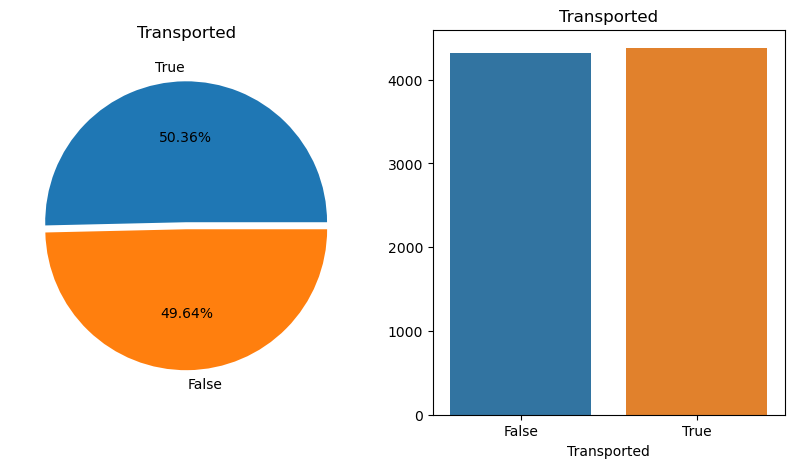

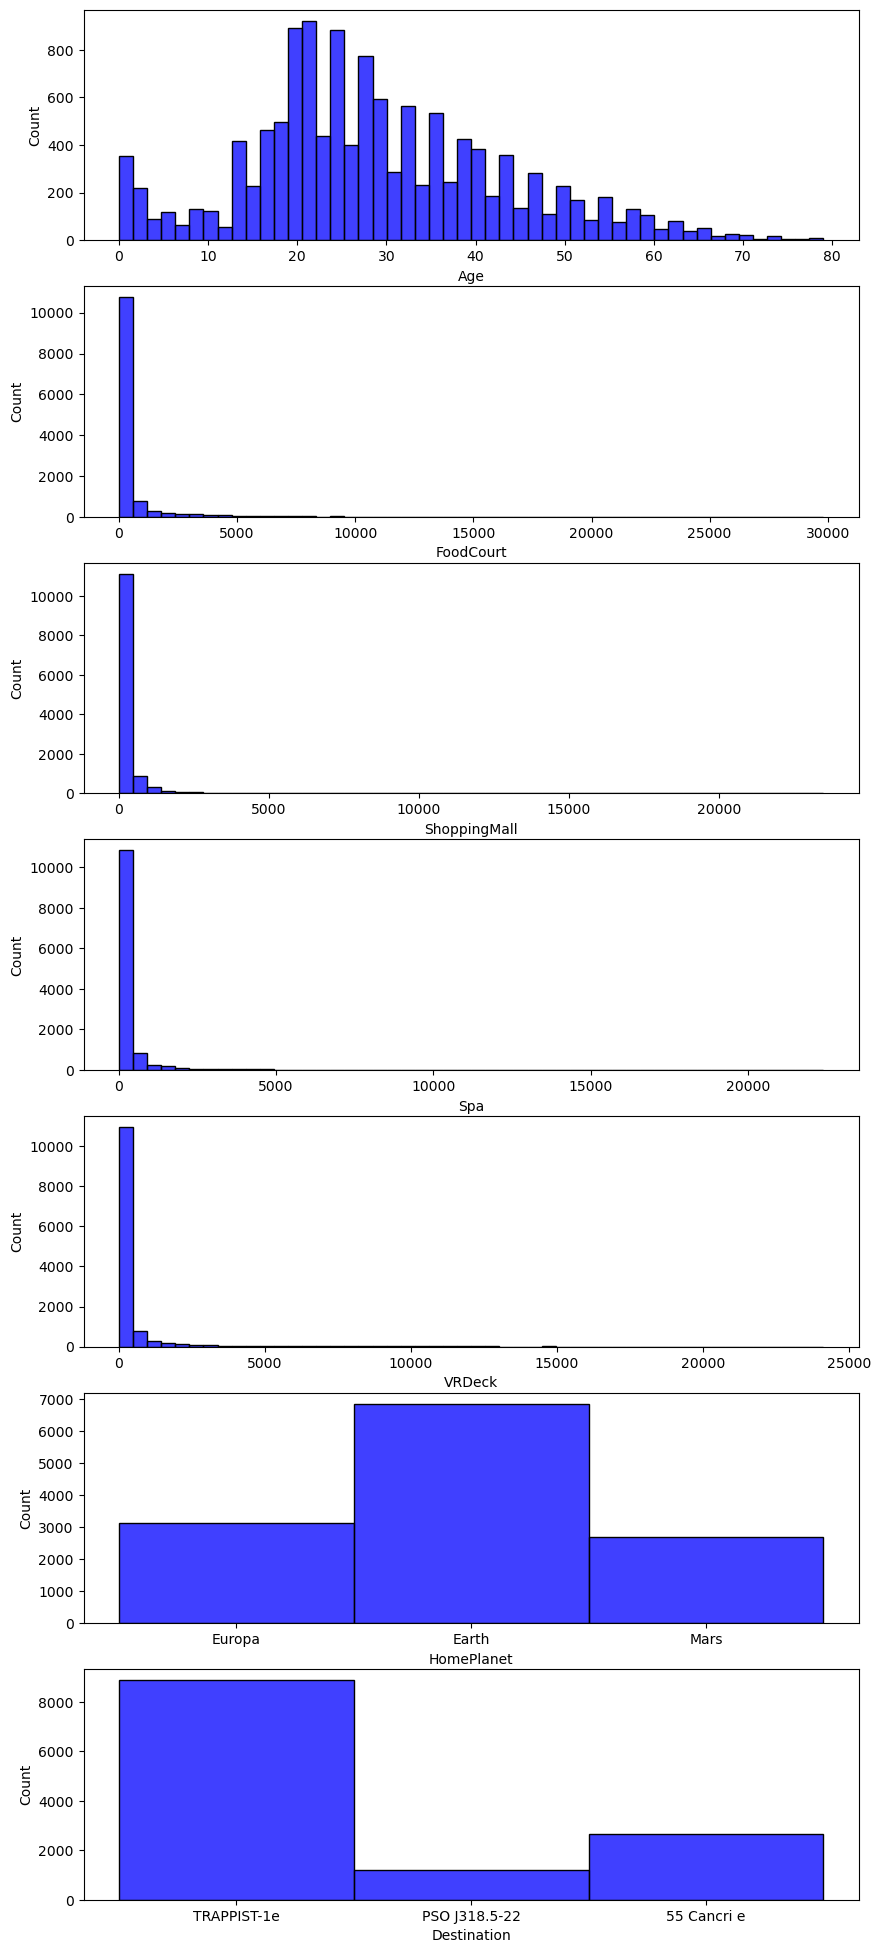

In [28]:
f,ax=plt.subplots(1,2,figsize=(10,5))
data['Transported'].value_counts().plot.pie(explode=[0,0.05],autopct='%0.2f%%',ax=ax[0])
ax[0].set_title('Transported')
ax[0].set_ylabel('')
sns.countplot(x='Transported',data=data,ax=ax[1]) 
ax[1].set_title('Transported')
ax[1].set_ylabel('')

fig, ax = plt.subplots(7,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(data['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(data['FoodCourt'], color='b', bins=50, ax=ax[1]);
sns.histplot(data['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(data['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(data['VRDeck'], color='b', bins=50, ax=ax[4]);
sns.histplot(data['HomePlanet'], color='b', bins=50, ax=ax[5]);
sns.histplot(data['Destination'], color='b', bins=50, ax=ax[6]);


## First, I will change the value of ‘Transported’, changing it to numbers

In [29]:
# Replace True to 1 and False to 0 in 'Transported' column
train_data['Transported'] = train_data['Transported'].astype(int)

## Let's verify the null dates

In [30]:
train_data.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [31]:
test_data.isnull().sum()

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64